In [ ]:
# @title Dataset
data=pd.read_csv('MSFT.csv')
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.060337,58435200
6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.058692,59990400
7,1986-03-24,0.092882,0.092882,0.089410,0.090278,0.057046,65289600
8,1986-03-25,0.090278,0.092014,0.089410,0.092014,0.058143,32083200
9,1986-03-26,0.092014,0.095486,0.091146,0.094618,0.059788,22752000


In [ ]:
# @title 1) Missing value analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9083 non-null   object 
 1   Open       9083 non-null   float64
 2   High       9083 non-null   float64
 3   Low        9083 non-null   float64
 4   Close      9083 non-null   float64
 5   Adj Close  9083 non-null   float64
 6   Volume     9083 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 496.9+ KB


In [ ]:
print(f"There are {data.shape[0]} rows in dataframe.")
print(f"And {data.shape[1]} columns. \n")

print(f"Columns: {data.columns} \n")

print(f"Percentage of Null values: \n {data.isnull().sum() / data.shape[0]} \n")


There are 9083 rows in dataframe.
And 7 columns. 

Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

Percentage of Null values: 
 Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64 



Certainly No missing values is found in the dataset

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset from a CSV file
data = pd.read_csv("MSFT.csv")

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Impute missing values in numeric columns
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Forward fill missing values in the 'Date' column
data['Date'] = pd.to_datetime(data['Date'])
data['Date'].fillna(method='ffill', inplace=True)

# Print the pre-processed dataset with imputed values
print("Pre-processed dataset with imputed values:\n", data.head())


Missing values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Pre-processed dataset with imputed values:
         Date      Open      High       Low     Close  Adj Close        Volume
0 1986-03-13  0.088542  0.101563  0.088542  0.097222   0.061434  1.031789e+09
1 1986-03-14  0.097222  0.102431  0.097222  0.100694   0.063628  3.081600e+08
2 1986-03-17  0.100694  0.103299  0.100694  0.102431   0.064725  1.331712e+08
3 1986-03-18  0.102431  0.103299  0.098958  0.099826   0.063079  6.776640e+07
4 1986-03-19  0.099826  0.100694  0.097222  0.098090   0.061982  4.789440e+07


In [ ]:
#@title Identifying the  year and momnth from date
def date_column_preprocessing():

    # changing Date column dtype
    data["Date"] = pd.to_datetime(data["Date"])

    # years column creating
    data["Year"] = pd.DatetimeIndex(data["Date"]).year

    # month column creating
    data["Month"] = data["Date"].dt.month_name()

date_column_preprocessing()

# new prepared dataset creating
main_data = data[["Open", "Close", "Adj Close", "High", "Low", "Volume", "Date", "Year", "Month"]]

main_data

,Open,Close,Adj Close,High,Low,Volume,Date,Year,Month
0,0.088542,0.097222,0.061434,0.101563,0.088542,1031788800,1986-03-13,1986,March
1,0.097222,0.100694,0.063628,0.102431,0.097222,308160000,1986-03-14,1986,March
2,0.100694,0.102431,0.064725,0.103299,0.100694,133171200,1986-03-17,1986,March
3,0.102431,0.099826,0.063079,0.103299,0.098958,67766400,1986-03-18,1986,March
4,0.099826,0.098090,0.061982,0.100694,0.097222,47894400,1986-03-19,1986,March
...,...,...,...,...,...,...,...,...,...
9078,295.369995,300.429993,300.429993,301.000000,292.730011,43317000,2022-03-18,2022,March
9079,298.890015,299.160004,299.160004,300.140015,294.899994,28351200,2022-03-21,2022,March
9080,299.799988,304.059998,304.059998,305.000000,298.769989,27599700,2022-03-22,2022,March
9081,300.510010,299.489990,299.489990,303.230011,297.720001,25715400,2022-03-23,2022,March


In [ ]:
# time series
dates = main_data["Date"]
years = main_data["Year"]
months = main_data["Month"]

# numeric info
low = main_data["Low"]
high = main_data["High"]
volume = main_data["Volume"]
adj_close = main_data["Adj Close"]
close = main_data["Close"]
open = main_data["Open"]


# 2)Visualizations

In [ ]:
#@title 2 a) Visualization of Closing Stock Price

import plotly.graph_objects as go
fig = go.Figure()


fig.add_trace(go.Scatter(x = dates, y = close,
                         name = "Close Price",
                         line = dict(color = "green", width = 2)))


fig.update_layout(title = " Historiccal Close Prices of Microsoft Stock ", legend_title = "Legend",
                  xaxis_title = "Date", yaxis_title = "Price $")

fig.show()

Statistical measures
Mean 41.335627591654735
Median  26.84
Mode 0.361111


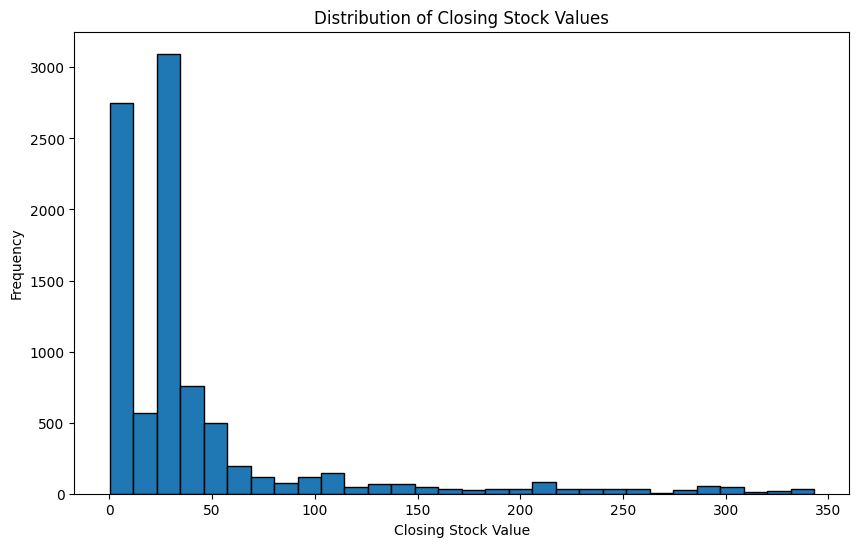

In [ ]:
#@title 2 b) Distribution of Closing Stock Values:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset using pandas
data = pd.read_csv('MSFT.csv')  # Replace 'path/to/microsoft_stock_data.csv' with the actual file path

# Extract the 'Close' column
closing_values = data['Close']

print("Statistical measures")
print("Mean",closing_values.mean())
print("Median ",closing_values.median())
mode=closing_values.mode()
print("Mode",mode[0])
# Plot the distribution of closing stock values
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.hist(closing_values, bins=30, edgecolor='black')  # Adjust the number of bins if needed
plt.xlabel('Closing Stock Value')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Stock Values')
plt.show()



<ipython-input-48-c16b96630d3b>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



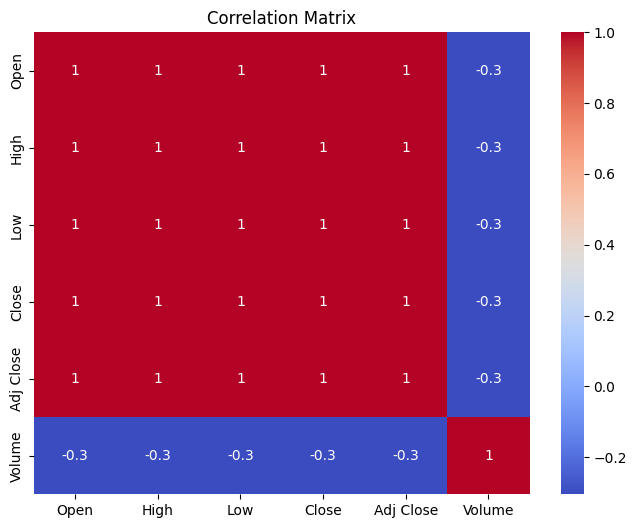

In [ ]:
#@title 2c) Correlation Matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('MSFT.csv')

correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




In [ ]:
#@title 2 d) High and Low Values of Microsoft Stock
fig = go.Figure()

fig.add_trace(go.Scatter(x = dates, y = high,
                         name = "Highest Price",
                         line = dict(color = "Red", width = 2)))
fig.add_trace(go.Scatter(x = dates, y = low,
                         name = "Lowest Price",
                         line = dict(color = "Green", width = 2)))

fig.update_layout(title = "Maximum and Minimum Prices", legend_title = "Legend",
                  xaxis_title = "Date", yaxis_title = "Price $")

fig.show()

In [ ]:
#@title 2 e) Visualization of Volume of Stocks traded across the years

import plotly.express as px
fig = go.Figure()

fig = px.histogram(main_data, x = dates, y = volume,
                   barmode = 'group',
                   nbins = 50,
                   hover_data = main_data.columns)

fig.update_layout(title = "Number of units traded per day", legend_title = "Legend",
                  xaxis_title = "Date", yaxis_title = "Count")

fig.update_xaxes(rangeslider_visible=True)

fig.show()

In [ ]:
#@title selecting data from years 2015-2022
df_15_22 = main_data[main_data["Year"] >= 2015][main_data["Year"] <= 2022]

dates_15_22 = df_15_22["Date"]

open_15_22 = df_15_22["Open"]
close_15_22 = df_15_22["Close"]
adj_close_15_22 = df_15_22["Adj Close"]
min_15_22 = df_15_22["Low"]
max_15_22 = df_15_22["High"]

df_15_22

<ipython-input-54-0b8e667222d5>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Open,Close,Adj Close,High,Low,Volume,Date,Year,Month
7263,46.660000,46.759998,41.108837,47.419998,46.540001,27913900,2015-01-02,2015,January
7264,46.369999,46.330002,40.730808,46.730000,46.250000,39673900,2015-01-05,2015,January
7265,46.380001,45.650002,40.132988,46.750000,45.540001,36447900,2015-01-06,2015,January
7266,45.980000,46.230000,40.642883,46.459999,45.490002,29114100,2015-01-07,2015,January
7267,46.750000,47.590000,41.838531,47.750000,46.720001,29645200,2015-01-08,2015,January
...,...,...,...,...,...,...,...,...,...
9078,295.369995,300.429993,300.429993,301.000000,292.730011,43317000,2022-03-18,2022,March
9079,298.890015,299.160004,299.160004,300.140015,294.899994,28351200,2022-03-21,2022,March
9080,299.799988,304.059998,304.059998,305.000000,298.769989,27599700,2022-03-22,2022,March
9081,300.510010,299.489990,299.489990,303.230011,297.720001,25715400,2022-03-23,2022,March


In [ ]:
#@title 2 f) Visual indicating Difference Between Opening and Closing Price of Stocks from the years 2015-2022
bear_15_22 = df_15_22[df_15_22["Open"] < df_15_22["Close"]].shape[0]
bull_15_22 = df_15_22[df_15_22["Open"] > df_15_22["Close"]].shape[0]
equal_15_22 = df_15_22[df_15_22["Open"] == df_15_22["Close"]].shape[0]

fig = go.Figure()

fig = px.pie(labels = ["Open price is less than Close price", "Open Price higher than Close price", "Open Price is equal to Close price"], values = [bear_15_22, bull_15_22, equal_15_22],
             names = ["Open price is less than Close price", "Open Price higher than Close price", "Open Price is equal to Close price"], title = "Difference between Open and Close prices pie plot from years 2015-2022",
             hole = 0.1,
             color = ["Yellow", "Red", "Orange"],
             color_discrete_map = {"Yellow" : "#FFF700",
                                   "Red" : "Light Blue",
                                   "Orange" : "#FF6200"})

fig.update_traces(textposition = "inside", textinfo = "label+percent+value", hoverinfo = "label+percent", textfont_size = 13)


fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

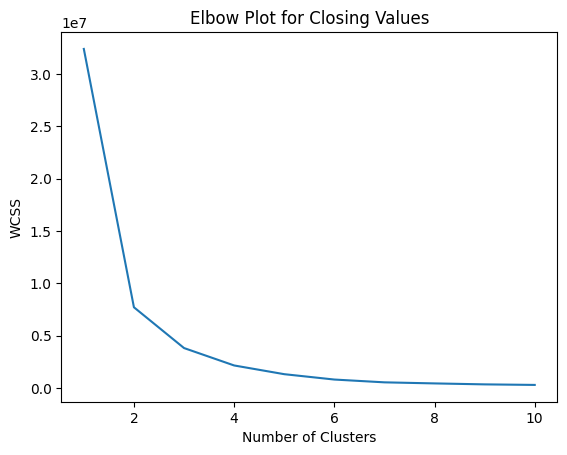

In [ ]:
# @title elbow method to find  number of clusters
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv('MSFT.csv')  # Replace with the actual filename and path of the dataset
closing_values = data['Close']


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(closing_values.values.reshape(-1, 1))
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot for Closing Values')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



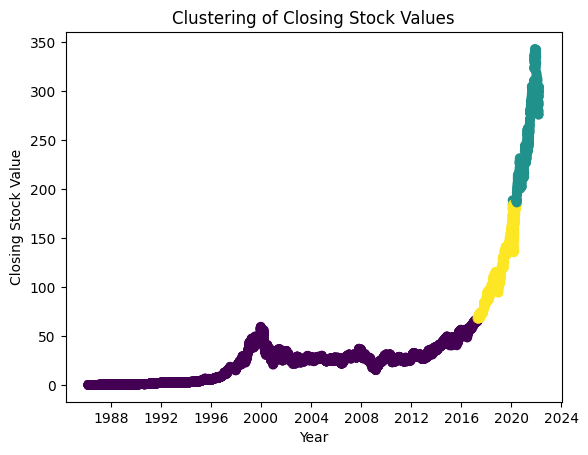

In [ ]:
# @title 3) K Means clustering
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('MSFT.csv')
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' column to datetime

# Extract the closing stock values
closing_stock = data['Close'].values.reshape(-1, 1)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(closing_stock)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Plot the clusters
plt.scatter(data['Date'], closing_stock, c=labels, cmap='viridis')
plt.xlabel('Year')
plt.ylabel('Closing Stock Value')
plt.title('Clustering of Closing Stock Values')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('MSFT.csv')
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' column to datetime

# Extract the closing stock values
closing_stock = data['Close'].values.reshape(-1, 1)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(closing_stock)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the centroids for each cluster
centroids = kmeans.cluster_centers_

# Print the centroids
for i, centroid in enumerate(centroids):
    print(f"Centroid for Cluster {i+1}: {centroid[0]}")

Centroid for Cluster 1: 21.518423005096555
Centroid for Cluster 2: 257.132021721739
Centroid for Cluster 3: 113.8089047706186


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




K-means clustering is a popular unsupervised machine learning algorithm used for clustering data points into distinct groups. Here's an example code that demonstrates how to perform K-means clustering using scikit-learn in Python:

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('MSFT.csv')

# Extract the closing stock values
closing_stock = data['Close'].values.reshape(-1, 1)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(closing_stock)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Calculate the range of values for each cluster
cluster_ranges = []
for i in range(3):
    cluster_values = closing_stock[labels == i]
    cluster_range = (cluster_values.min(), cluster_values.max())
    cluster_ranges.append(cluster_range)

# Print the range of values for each cluster
for i, cluster_range in enumerate(cluster_ranges):
    print(f"Cluster {i+1} Range: {cluster_range}")


Cluster 1 Range: (0.090278, 67.529999)
Cluster 2 Range: (185.660004, 343.109985)
Cluster 3 Range: (67.690002, 185.360001)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Outlier indices and their Z score value: 
 8685    3.011231
8686    3.102164
8687    3.141183
8688    3.084580
8689    3.113719
          ...   
9078    4.338880
9079    4.317613
9080    4.399670
9081    4.323139
9082    4.400340
Name: Close, Length: 317, dtype: float64
Number of outliers: 317


Text(0.5, 1.0, 'Outliers')

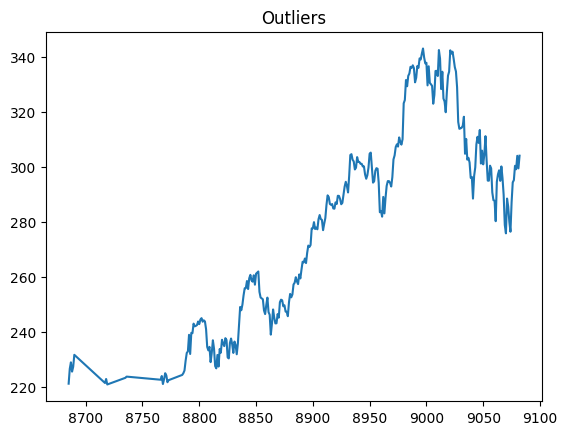

In [ ]:
#@title 4) Outlier detection using z score
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('MSFT.csv')

# Calculate the z-score for the 'Close' column
z_scores = np.abs((df['Close'] - df['Close'].mean()) / df['Close'].std())

# Define a threshold for outlier detection (e.g., z-score greater than 3)
threshold = 3

# Count the number of outliers
values=z_scores[z_scores > threshold]
print("Outlier indices and their Z score value: \n", values)
outliers_count = len(z_scores[z_scores > threshold])

# Print the number of outliers
print("Number of outliers:", outliers_count)
x=df['Close']
plt.plot(x[values.index])
plt.title("Outliers")

In [ ]:
# Drop the outliers from the DataFrame
df_without_outliers = df.drop(values.index)

# Print the number of outliers dropped
print("Number of outliers dropped:", len(values.index))


Number of outliers dropped: 317


Principal Component Analysis:

Principal Component Analysis (PCA) is a dimensionality reduction technique that is commonly used in data analysis and machine learning. It aims to transform a high-dimensional dataset into a lower-dimensional space while retaining the most important information and minimizing the loss of variability in the data.

In [ ]:
#@title 5) Principal Component Analysis
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the MSFT stock dataset from a CSV file
data = pd.read_csv("/content/MSFT.csv")

# Extract the numerical features for PCA
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Standardize the features by scaling them
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
pca.fit(scaled_features)

# Obtain the principal components
principal_components = pca.transform(scaled_features)

# Print the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained variance ratio of PC{i+1}: {ratio:.4f}")

# Optional: You can also access the principal components as a DataFrame
principal_df = pd.DataFrame(data=principal_components,
                            columns=[f"PC{i+1}" for i in range(len(features.columns))])
print(principal_df.head())

Explained variance ratio of PC1: 0.8513
Explained variance ratio of PC2: 0.1480
Explained variance ratio of PC3: 0.0006
Explained variance ratio of PC4: 0.0000
Explained variance ratio of PC5: 0.0000
Explained variance ratio of PC6: 0.0000
        PC1        PC2       PC3       PC4       PC5       PC6
0 -5.603857  24.723958 -0.138160  0.006576 -0.060616  0.001456
1 -2.540969   6.154928 -0.092432  0.000110 -0.014618  0.000246
2 -1.800261   1.664549 -0.081367 -0.001458 -0.003504 -0.000045
3 -1.523471  -0.013811 -0.077221 -0.002091  0.000678 -0.000148
4 -1.439436  -0.523759 -0.075983 -0.002256  0.001936 -0.000182


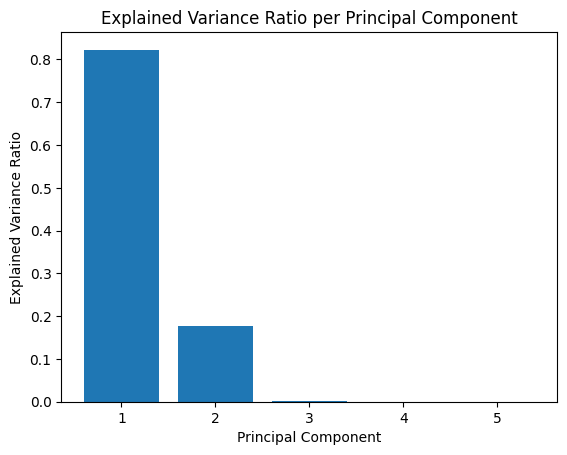

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have already loaded the dataset into a Pandas DataFrame called 'data'
data = pd.read_csv("/content/MSFT.csv")

# Extract the features (X) and target variable (y) from the dataset

X = data.drop(['Date', 'Close'], axis=1)  # Exclude the 'Date' and 'Close' columns from features
y = data['Close']

# Standardize the features by scaling them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=5)  # Specify the number of components you want to keep
X_pca = pca.fit_transform(X_scaled)

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()



Explained variance ratio of PC1: 0.8513
Explained variance ratio of PC2: 0.1480
Explained variance ratio of PC3: 0.0006
Explained variance ratio of PC4: 0.0000
Explained variance ratio of PC5: 0.0000
Explained variance ratio of PC6: 0.0000


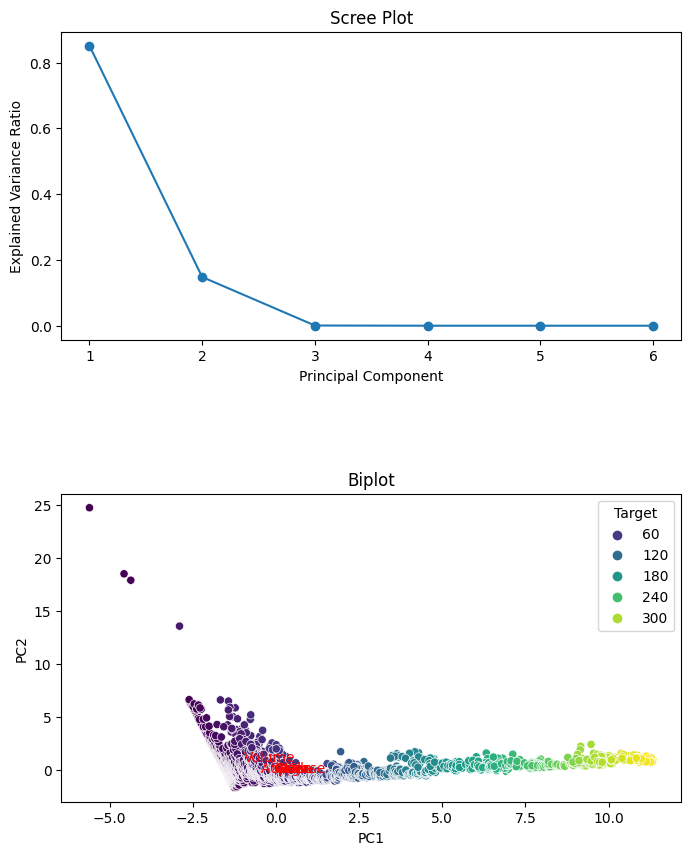

In [ ]:
#@title Scree plot and Bi plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the MSFT stock dataset from a CSV file
data = pd.read_csv("/content/MSFT.csv")

# Extract the numerical features for PCA
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Standardize the features by scaling them
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
pca.fit(scaled_features)

# Obtain the principal components
principal_components = pca.transform(scaled_features)

# Print the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained variance ratio of PC{i+1}: {ratio:.4f}")

# Create a new figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Plot the scree plot
ax1.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot')
ax1.set_xticks(range(1, len(explained_variance_ratio) + 1))

# Plot the biplot
sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='Target', palette='viridis', ax=ax2)
for i, feature in enumerate(features.columns):
    ax2.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='red', alpha=0.5)
    ax2.text(pca.components_[0, i]*1.2, pca.components_[1, i]*1.2, feature, color='red', ha='center', va='center')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('Biplot')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()
